# Palmer Archipelago (Antarctica) penguin data - Exploratory Data Analysis
## Data Set
Link: [Palmer Archipelago (Antarctica) penguin data](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

## Apply EDA techniques like
- Find correlation between variables
- Plot different features
- Detect outlier / missing values if any etc.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('Palmer Archipelago (Antarctica) penguin data/penguins_lter.csv')

In [3]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## Pandas Profiling

In [4]:
profile = ProfileReport(df)
profile.to_file('report.html')

## Drop Columns

* `Sample Number` - has 152 Distinct values (44.2%)
* `Region` - only one region "Anvers"
* `Stage` - only one stage "Adult, 1 Egg Stage"
* `Individual ID` - 190 Distinct Ids (55.2%)

In [4]:
df = df.drop(['Sample Number', 'Region', 'Stage', 'Individual ID'], axis=1)

`Date Egg` columns is not in datetime format

In [5]:
df['Date Egg'] = pd.to_datetime(df['Date Egg'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            344 non-null    object        
 1   Species              344 non-null    object        
 2   Island               344 non-null    object        
 3   Clutch Completion    344 non-null    object        
 4   Date Egg             344 non-null    datetime64[ns]
 5   Culmen Length (mm)   342 non-null    float64       
 6   Culmen Depth (mm)    342 non-null    float64       
 7   Flipper Length (mm)  342 non-null    float64       
 8   Body Mass (g)        342 non-null    float64       
 9   Sex                  334 non-null    object        
 10  Delta 15 N (o/oo)    330 non-null    float64       
 11  Delta 13 C (o/oo)    331 non-null    float64       
 12  Comments             26 non-null     object        
dtypes: datetime64[ns](1), float64(6), o

Number of Missing Values:

In [7]:
df.isna().sum()

studyName                0
Species                  0
Island                   0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Numberic:
```
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
```
> for numeric columns, the 'nan' values are replaced with Median value.

In [8]:
for i in ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 
            'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']:
    df[i] = df[i].fillna(df[i].median())

In [9]:
df.Sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

* There is `"."` in `Sex` column. So Drop this `"."`
* Removing `nan`

In [10]:
df = df[df.Sex != '.']
df = df[~df.isna()]

`Comments` column has `92.4%` of missing values. So don't drop the missing values of `Comments`

In [11]:
df.head()

,studyName,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,2007-11-11,39.10,18.7,181.0,3750.0,MALE,8.652405,-25.83352,Not enough blood for isotopes.
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,2007-11-11,39.50,17.4,186.0,3800.0,FEMALE,8.949560,-24.69454,NaN
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,2007-11-16,40.30,18.0,195.0,3250.0,FEMALE,8.368210,-25.33302,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,2007-11-16,44.45,17.3,197.0,4050.0,NaN,8.652405,-25.83352,Adult not sampled.
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,2007-11-16,36.70,19.3,193.0,3450.0,FEMALE,8.766510,-25.32426,NaN


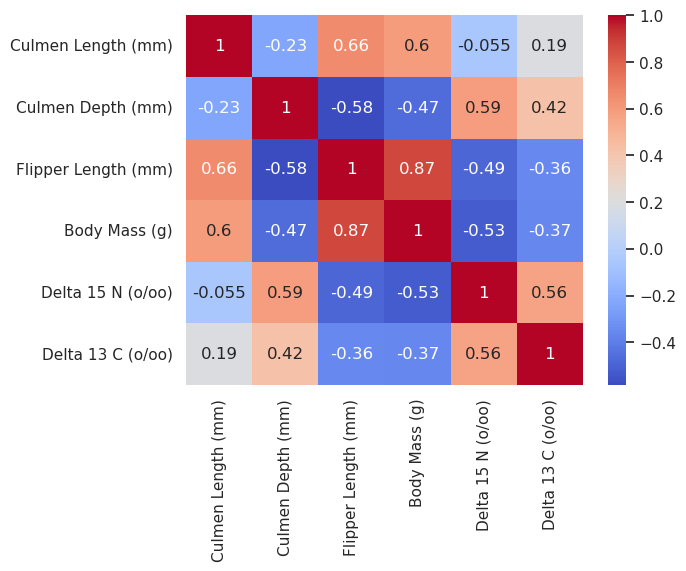

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

Here `Flipper Length (mm)` and `Body Mass (g)` are `Highly Correlated`.

In [15]:
df.shape

(343, 13)

In [31]:
df1 = df.groupby(['Species']).mean()
df1

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.828618,18.339474,190.000000,3702.960526,8.844729,-25.806316
Chinstrap penguin (Pygoscelis antarctica),48.833824,18.420588,195.823529,3733.088235,9.345806,-24.546542
Gentoo penguin (Pygoscelis papua),47.504472,14.995122,217.024390,5069.308943,8.253618,-26.179585


In [32]:
fig = px.bar(df1, barmode='group')
fig.show()

* Body Mass and Flipper Length of **Adelie Penguin (Pygoscelis adeliae)** and **Chinstrap penguin (Pygoscelis antarctica)** are almost Equal
* But Body Mass and Flipper Length of **Gentoo penguin (Pygoscelis papua)** is more than these two

In [36]:
df2 = df.groupby('Island').mean()
df2

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Island,,,,,,
Biscoe,45.257186,15.884431,209.586826,4711.077844,8.403791,-26.110849
Dream,44.167742,18.344355,193.072581,3712.903226,9.156732,-25.091662
Torgersen,39.056731,18.407692,191.307692,3712.980769,8.773860,-25.767998


In [37]:
fig = px.bar(df2, barmode='group')
fig.show()

Body Mass and Flipper Length of `Biscoe` is more than `Dream` and `Torgersen` Island

In [41]:
df3 = df.groupby('Sex').mean()
df3

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sex,,,,,,
FEMALE,42.096970,16.425455,197.363636,3862.272727,8.675015,-25.683114
MALE,45.854762,17.891071,204.505952,4545.684524,8.799024,-25.689750


In [42]:
fig = px.bar(df3, barmode='group')
fig.show()

`Culmen Length`, `Culmen Depth (mm)`, `Flipper Length (mm)` and `Body Mass (g)` of **MALE** is higher than **FEMALE**

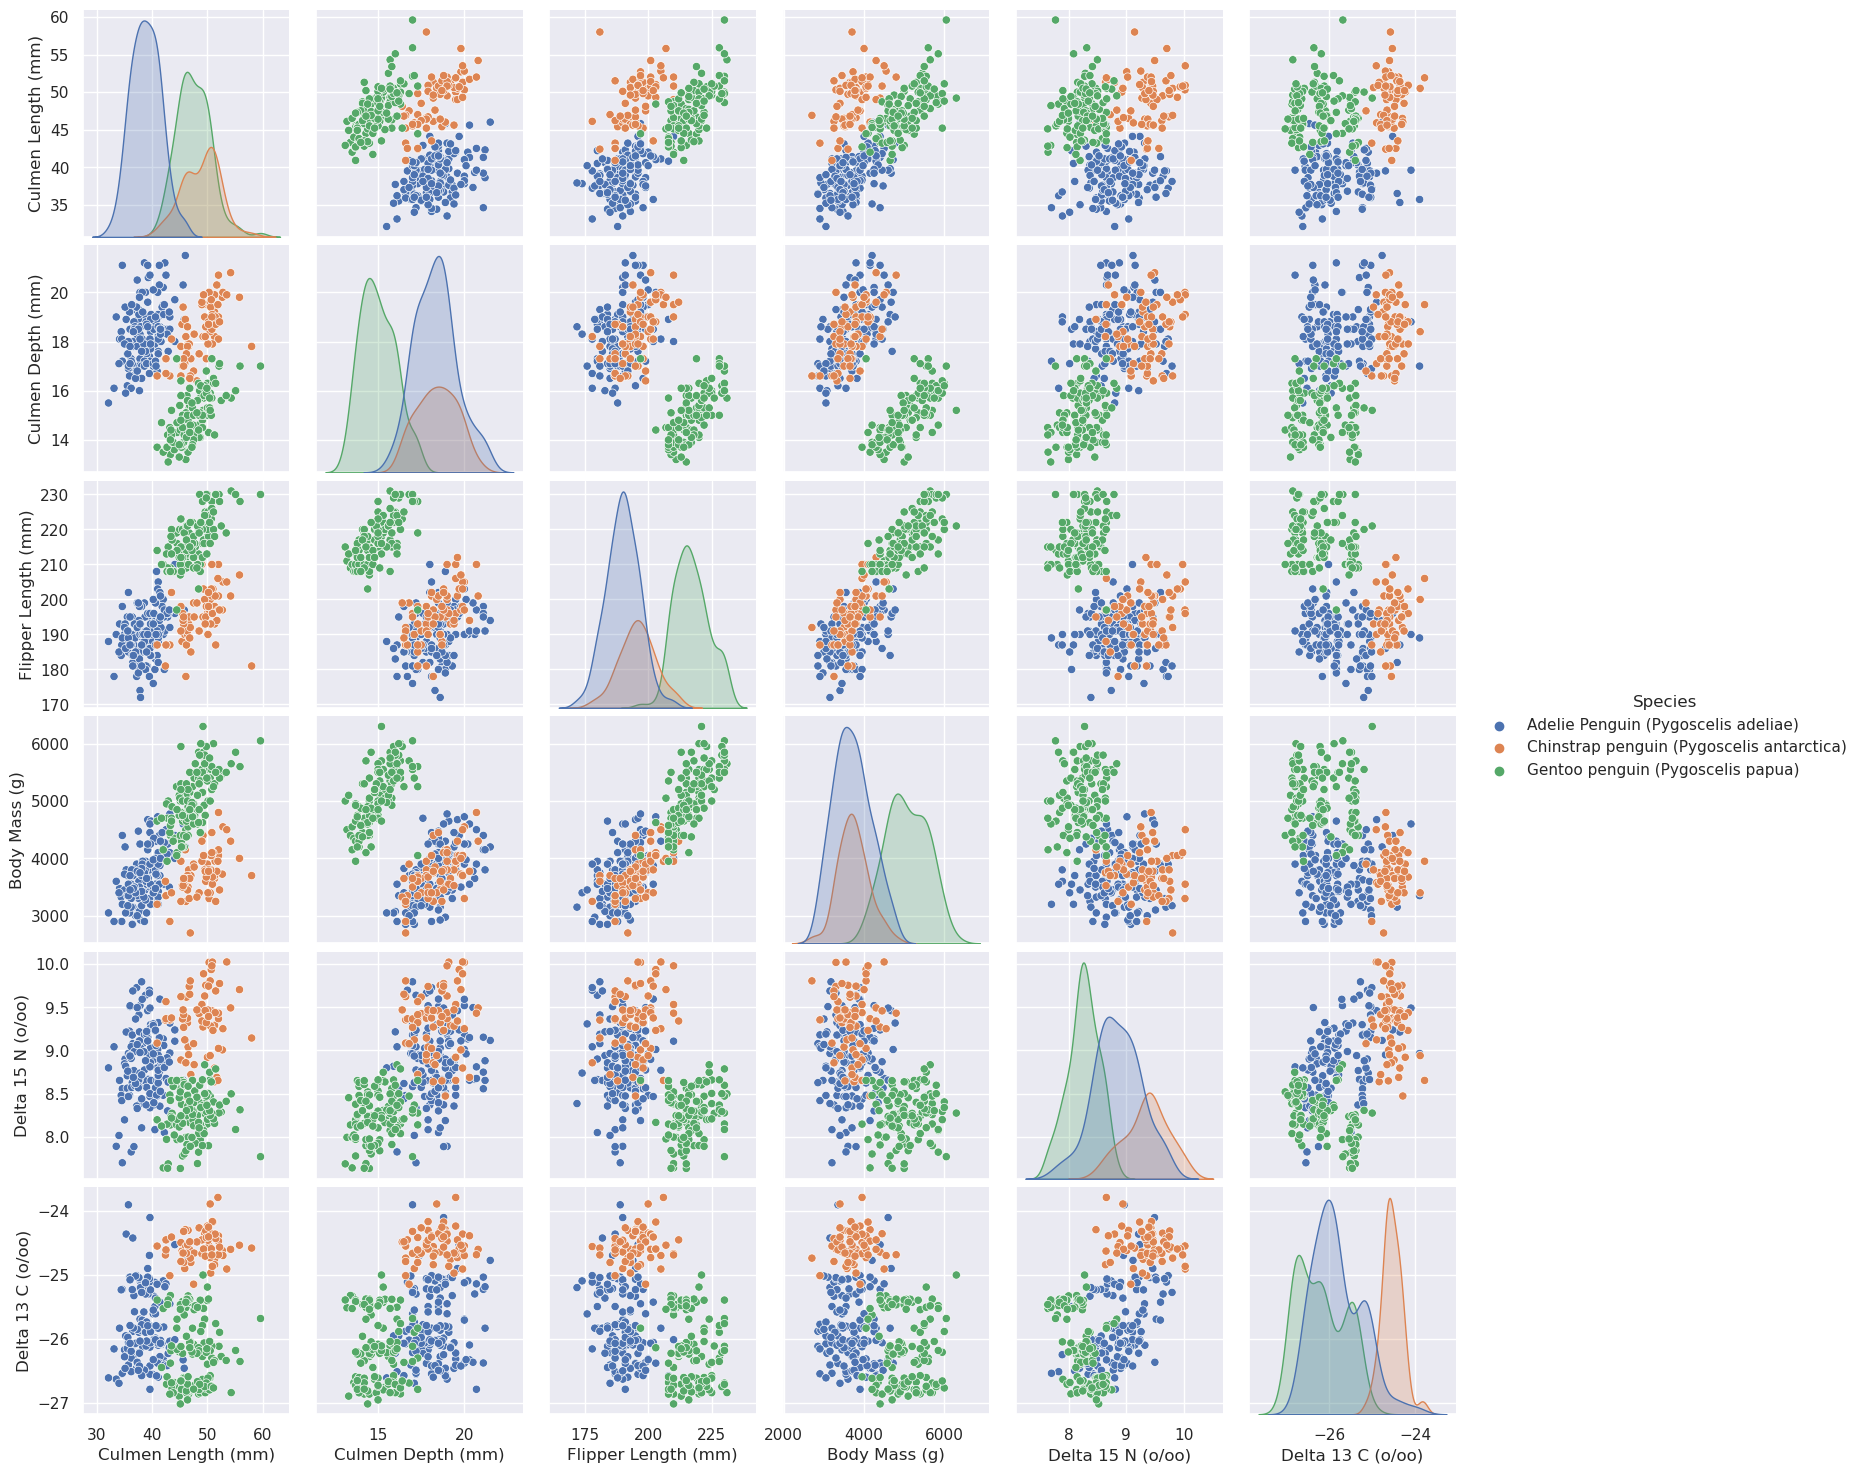

In [44]:
sns.pairplot(df, hue='Species');

* **Body Mass** and **Flipper Length** are `highly correlated` and **Body Mass** `increases` when **Flipper Length** is `increases`.
* **Culmen Length** and **Flipper Length** are correlated
* **Culmen Length** and **Body Mass** are correlated
* **Culmen Depth** and **Delta 15 N** are correlated
* **Delta 15 N** and **Delta 13 C** are correlated

In [47]:
df.corr() > 0.5

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),True,False,True,True,False,False
Culmen Depth (mm),False,True,False,False,True,False
Flipper Length (mm),True,False,True,True,False,False
Body Mass (g),True,False,True,True,False,False
Delta 15 N (o/oo),False,True,False,False,True,True
Delta 13 C (o/oo),False,False,False,False,True,True
